# Data Science Project
# Sadik Ansari
# Project Title - Predict Profit based on multiple input 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns     
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
data = pd.read_csv('E:\\materials\\Assignment\\Assignment5\\50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#check for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# check the correlation
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

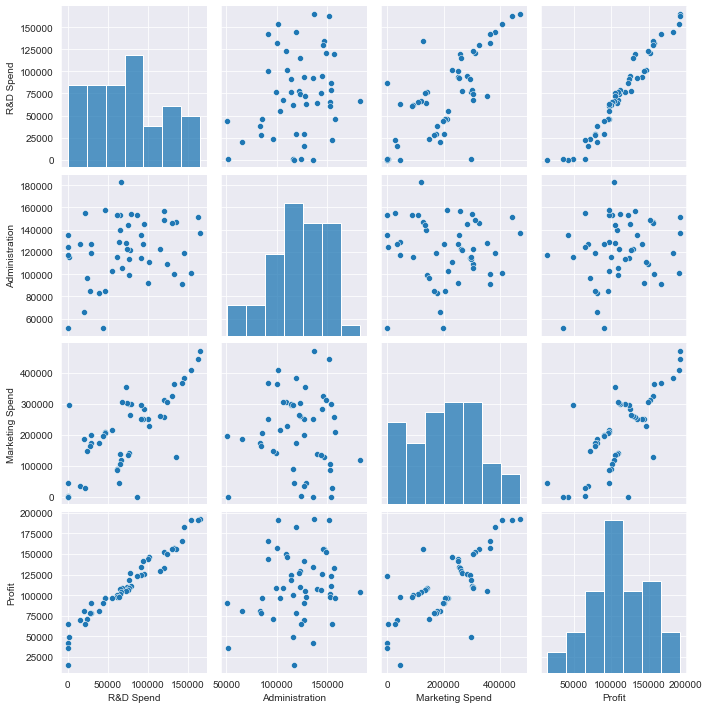

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [8]:
# drop the unneeded columns
df = data.drop(['State','Administration'],axis = 1)

In [9]:
# rename columns name
df1 = df.rename({'R&D Spend':'RDSpend','Marketing Spend':'MarketingSpend'},axis =1)
df1.head()

,RDSpend,MarketingSpend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [10]:
x =df1[['RDSpend','MarketingSpend']]

In [11]:
#building model
model = smf.ols('Profit~x',data = df1).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.16e-31
Time:                        00:15:44   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x[0]           0.7966      0.041     19.266      0.000       0.713       0.880
x[1]           0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Finding Cook's Distance

In [13]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([1.81512394e-04, 2.17714151e-03, 3.85030256e-02, 2.97393985e-02,
       7.43914487e-03, 8.87288175e-03, 3.60799476e-03, 4.97976353e-03,
       2.01902031e-06, 4.00294501e-03, 1.64482064e-02, 1.07062146e-02,
       1.52583172e-02, 4.10195007e-03, 6.23696501e-02, 4.28041217e-02,
       1.08143179e-02, 3.37984862e-03, 2.70426509e-03, 5.18325214e-02,
       5.68610172e-04, 8.25784837e-03, 4.13103131e-03, 3.07888695e-04,
       2.54030757e-03, 2.87274239e-03, 4.56256249e-03, 3.76461096e-02,
       4.04646886e-06, 3.84226278e-04, 1.54537882e-04, 1.49920702e-04,
       7.91098475e-04, 7.81029691e-05, 6.23157729e-03, 6.50961158e-03,
       5.60674443e-02, 5.62367665e-04, 4.68122817e-02, 5.47791686e-04,
       2.06083678e-03, 2.68539324e-03, 3.32631540e-04, 2.55928157e-02,
       2.50014790e-05, 1.17553495e-01, 7.74416953e-02, 7.99827600e-03,
       5.61942095e-02, 3.89488623e-01])

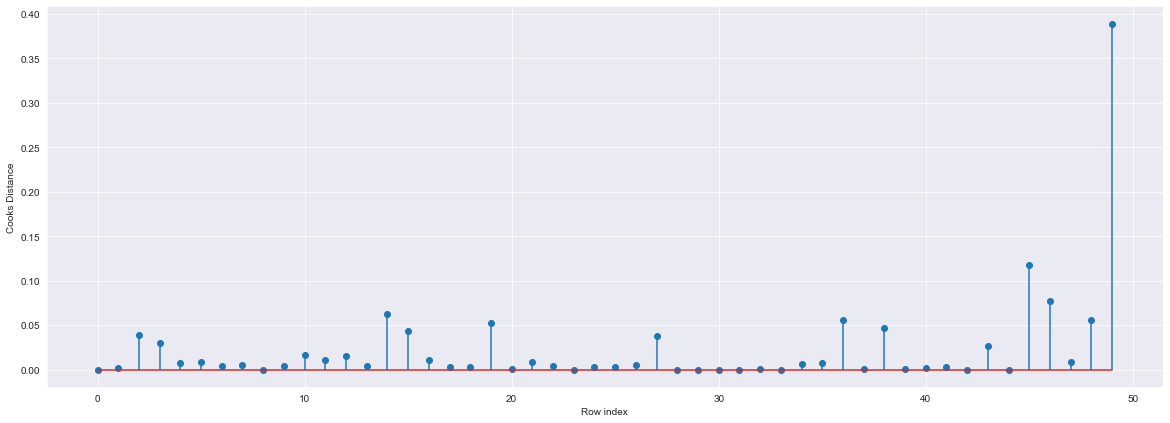

In [14]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [15]:
(np.argmax(c),np.max(c))

(49, 0.3894886227924919)

In [16]:
df2=df1.drop(df1.index[[49]],axis=0)
df2.head()

,RDSpend,MarketingSpend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [17]:
#building the  model
model2 = smf.ols('Profit~RDSpend+MarketingSpend',data = df2).fit()

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           3.74e-33
Time:                        00:15:44   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDSpend            0.7754      0.035     22.136      0.000       0.705       0.846
MarketingSpend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
actual =df2.Profit
pred = model2.predict(df2)
residual = actual - pred

In [20]:
actual.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
residual.head()

0     1319.103073
1     3748.135480
2    11093.077528
3    10655.573836
4    -3834.747457
dtype: float64

In [22]:
residual.mean()

-2.1530894980746872e-11

In [23]:
# create dataframe
errors_df= pd.DataFrame({"actual":actual,"prediction":pred,"errors":residual})
errors_df.head()

,actual,prediction,errors
0,192261.83,190942.726927,1319.103073
1,191792.06,188043.924520,3748.135480
2,191050.39,179957.312472,11093.077528
3,182901.99,172246.416164,10655.573836
4,166187.94,170022.687457,-3834.747457


In [24]:
#new data for prediction
new_data=pd.DataFrame({'RDSpend':2000,'MarketingSpend':4000},index=[1])

In [25]:
model2.predict(new_data)

1    51445.819617
dtype: float64